In [7]:
pip install tensorflow scikit-learn matplotlib seaborn



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: C:\Users\palak\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [8]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Define the path for images and CSV
image_base_path = r'C:\Users\palak\Desktop\DIABETI RETINOPATHY\colored_images'
csv_file_path = r'C:\Users\palak\Desktop\DIABETI RETINOPATHY\train.csv'

# Load the CSV file to match images with labels
train_df = pd.read_csv(csv_file_path)

# Define image dimensions
IMG_WIDTH, IMG_HEIGHT = 224, 224

# Helper function to load and preprocess images
def load_and_preprocess_images(image_base_path, train_df):
    images = []
    labels = []
    for idx, row in train_df.iterrows():
        img_id = row['id_code']
        label = row['diagnosis']
        
        # Determine the directory based on the label
        if label == 0:
            directory = 'No_DR'
        elif label == 1:
            directory = 'Mild'
        elif label == 2:
            directory = 'Moderate'
        elif label == 3:
            directory = 'Severe'
        elif label == 4:
            directory = 'Proliferate_DR'
        
        # Construct the image path
        img_path = os.path.join(image_base_path, directory, f"{img_id}.png")
        
        if os.path.exists(img_path):
            # Load the image
            img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
            # Convert the image to array
            img_array = img_to_array(img)
            # Normalize the image
            img_array /= 255.0
            
            images.append(img_array)
            labels.append(label)

    # Convert to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load and preprocess the images and labels
images, labels = load_and_preprocess_images(image_base_path, train_df)

# Check the shapes of the loaded data
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)


Images shape: (3662, 224, 224, 3)
Labels shape: (3662,)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the CNN model
def create_model():
    model = Sequential([
        # Convolutional Layer 1
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Convolutional Layer 2
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Convolutional Layer 3
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Flatten the layers
        Flatten(),
        
        # Fully Connected Layer 1
        Dense(128, activation='relu'),
        Dropout(0.5),  # Regularization to prevent overfitting
        
        # Output Layer
        Dense(5, activation='softmax')  # 5 output classes (0 to 4)
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create the model
model = create_model()

# Print the model summary
model.summary()


C:\Users\palak\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),  
                    epochs=50,  # You can change this number based on the performance
                    batch_size=32,  # Adjust according to your GPU capacity
                    callbacks=[early_stopping])


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 75s 759ms/step - accuracy: 0.5952 - loss: 1.1697 - val_accuracy: 0.6917 - val_loss: 0.8299
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 65s 702ms/step - accuracy: 0.7071 - loss: 0.8109 - val_accuracy: 0.7162 - val_loss: 0.8218
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 73s 797ms/step - accuracy: 0.7320 - loss: 0.7824 - val_accuracy: 0.7108 - val_loss: 0.7832
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 838ms/step - accuracy: 0.7364 - loss: 0.7423 - val_accuracy: 0.7135 - val_loss: 0.7759
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 73s 791ms/step - accuracy: 0.7333 - loss: 0.7681 - val_accuracy: 0.7149 - val_loss: 0.7815
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 69s 748ms/step - accuracy: 0.7483 - loss: 0.7293 - val_accuracy: 0.7121 - val_loss: 0.7690
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 69s 749ms/step - accuracy: 0.7343 - loss: 0.7191 - val_accuracy: 0.6930 - val_loss: 0.7921
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 63s 679ms/step - accuracy: 0.7388 - loss: 0.7344 - val_accu

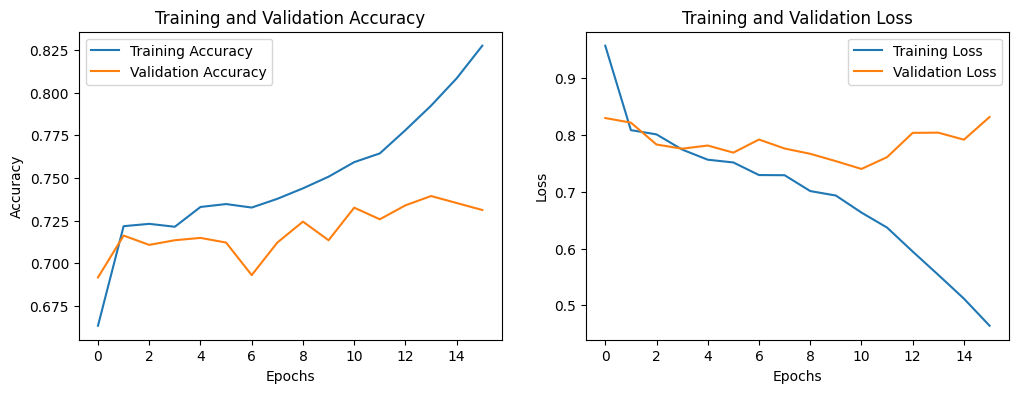

In [11]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [12]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.7258 - loss: 0.7633
Validation Loss: 0.7402
Validation Accuracy: 0.7326


In [13]:
# Save the trained model to a file
model.save('diabetic_retinopathy_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [14]:
# Make predictions on the validation set
predictions = model.predict(X_val)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compare with actual labels
comparison = pd.DataFrame({'Actual': y_val, 'Predicted': predicted_labels})
print(comparison.head())


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step
   Actual  Predicted
0       0          0
1       0          0
2       4          2
3       0          0
4       0          0


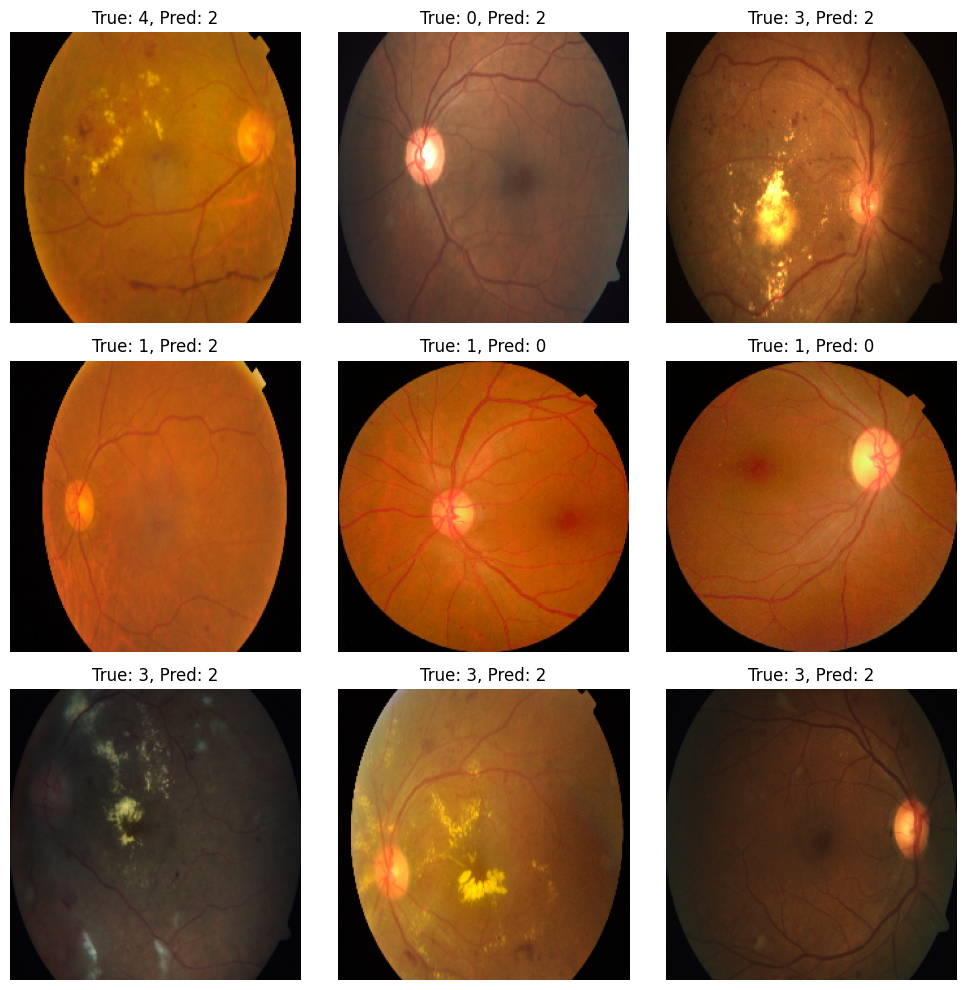

In [15]:
import matplotlib.pyplot as plt

# Find misclassified examples
misclassified_idx = np.where(predicted_labels != y_val)[0]

# Plot some misclassified images
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_idx[:9]):  # Show up to 9 misclassified images
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_val[idx])
    plt.title(f"True: {y_val[idx]}, Pred: {predicted_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator on the training data
datagen.fit(X_train)

# Use the augmented data for training
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=50,
                    callbacks=[early_stopping])


Epoch 1/50


C:\Users\palak\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 96s 997ms/step - accuracy: 0.6312 - loss: 1.0792 - val_accuracy: 0.7135 - val_loss: 0.8479
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 87s 913ms/step - accuracy: 0.6845 - loss: 0.8875 - val_accuracy: 0.7121 - val_loss: 0.8459
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 90s 943ms/step - accuracy: 0.7088 - loss: 0.8442 - val_accuracy: 0.7026 - val_loss: 0.8692
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 88s 923ms/step - accuracy: 0.7133 - loss: 0.8429 - val_accuracy: 0.7108 - val_loss: 0.8222
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 78s 824ms/step - accuracy: 0.7104 - loss: 0.8280 - val_accuracy: 0.7067 - val_loss: 0.8788


In [17]:
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define the input shape
input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)

# Choose a pre-trained model and load it without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the base model to retain the pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for diabetic retinopathy classification
inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
outputs = Dense(5, activation='softmax')(x)  # 5 output classes

# Combine the base model and custom layers into a new model
transfer_model = Model(inputs, outputs)

# Compile the model with an optimizer and loss function
transfer_model.compile(optimizer=Adam(learning_rate=0.0001), 
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])

# Print the model summary
transfer_model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,433,541 (138.98 MB)

 Trainable params: 12,845,829 (49.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [18]:
# Train the transfer learning model
history_transfer = transfer_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # Adjust the number of epochs based on your needs
    batch_size=32,  # Adjust the batch size based on your GPU capacity
    callbacks=[early_stopping]
)


Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.4138 - loss: 1.5904 - val_accuracy: 0.4925 - val_loss: 1.2302
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.4837 - loss: 1.2940 - val_accuracy: 0.4952 - val_loss: 1.1579
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.5416 - loss: 1.1743 - val_accuracy: 0.6044 - val_loss: 1.1338
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.5480 - loss: 1.1827 - val_accuracy: 0.5525 - val_loss: 1.0761
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.5631 - loss: 1.1257 - val_accuracy: 0.5853 - val_loss: 1.0433


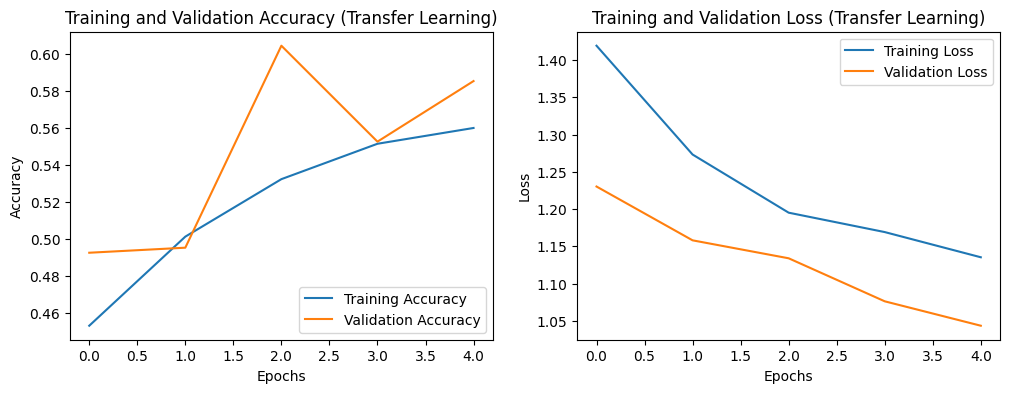

In [19]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Transfer Learning)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['loss'], label='Training Loss')
plt.plot(history_transfer.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Transfer Learning)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [20]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: C:\Users\palak\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [21]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [22]:
pip install keras tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: C:\Users\palak\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [23]:
# Define the input shape for the images (common for ResNet50 is 224x224)
IMG_WIDTH, IMG_HEIGHT = 224, 224
input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)  # 3 is for RGB channels

# Import necessary libraries
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define a list of hyperparameters to try
learning_rates = [0.001, 0.0001]
dropout_rates = [0.3, 0.5, 0.7]
batch_sizes = [16, 32]
epochs = 20

# Function to create the model
def create_model(learning_rate, dropout_rate):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(5, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Manually try different hyperparameters
best_val_accuracy = 0
best_params = {}

for lr in learning_rates:
    for dr in dropout_rates:
        for bs in batch_sizes:
            print(f"Training with learning_rate={lr}, dropout_rate={dr}, batch_size={bs}")
            model = create_model(learning_rate=lr, dropout_rate=dr)
            history = model.fit(X_train, y_train,
                                validation_data=(X_val, y_val),
                                epochs=epochs,
                                batch_size=bs)
            val_accuracy = max(history.history['val_accuracy'])
            
            # Track the best performance
            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_params = {'learning_rate': lr, 'dropout_rate': dr, 'batch_size': bs}

print(f"Best Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Training with learning_rate=0.001, dropout_rate=0.3, batch_size=16
Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 170s 877ms/step - accuracy: 0.4199 - loss: 2.2400 - val_accuracy: 0.4925 - val_loss: 1.4341
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 158s 859ms/step - accuracy: 0.4984 - loss: 1.4028 - val_accuracy: 0.4925 - val_loss: 1.1103
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 158s 859ms/step - accuracy: 0.5069 - loss: 1.1828 - val_accuracy: 0.6166 - val_loss: 1.2008
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 158s 856ms/step - accuracy: 0.5112 - loss: 1.1553 - val_accuracy: 0.6767 - val_loss: 1.0205
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 159s 865ms/step - accuracy: 0.5498 - loss: 1.0974 - val_accuracy: 0.5662 - val_loss: 1.2123
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 154s 837ms/step - accuracy: 0.5329 - loss: 1.1552 - val_accuracy: 0.5853 - val_loss: 1.1816
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 154s 836ms/step - accuracy: 0.5314 - loss: 1.1364 - val_accuracy: 0.6889 - val_loss: 1.0137
Epoch 8/2